In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #Plotting
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split #Split the data into train and test
from sklearn.ensemble import RandomForestRegressor #Forest for prediction and regression
from sklearn.linear_model import LinearRegression #Regression for prediction
from sklearn.preprocessing import StandardScaler #Scale the data
from sklearn.metrics import mean_squared_error #Error testing

: 

In [2]:
df=pd.read_csv('/content/AB_US_2020.csv') #reading the airbnb csv

<ipython-input-2-7802e74fc0af>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/AB_US_2020.csv') #reading the airbnb csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [4]:
df["price"] = df["price"].apply(lambda x: 1 if x < 1 else x) #Make 0's 1 so the log function works

In [5]:
df.isnull().any() #check for null values

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
city                              False
dtype: bool

### Fixing the null values

In [6]:
df["name"] = df["name"].fillna("AIRBNB House") #Fill the null name values with "AIRBNB House"
df["host_name"] = df["host_name"].fillna("AIRBNB Host") #Fill the null host name values with "AIRBNB HOST"

In [7]:
df["neighbourhood_group"] = df["neighbourhood_group"].fillna("Other") #Fill the null neighbourhood group values with "Other"
df["reviews_per_month"] = df["reviews_per_month"].fillna(0) #Fill the null reviews_per_month values with 0

In [8]:
df["last_review"] = df["last_review"].fillna("01/01/01") #Fill the null last_review values with 01/01/01
df["last_review"] = pd.to_datetime(df["last_review"]) #Convert the last review to datetime
### These coloumns will be removed later on if not required after gathering up more data

In [9]:
df.isnull().any()# no value is left that is null

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
city                              False
dtype: bool

In [10]:
df.corr().style.background_gradient(cmap='Accent')

<ipython-input-10-3a5240884996>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='Accent')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.537812,-0.057875,-0.010406,0.021400,-0.001617,-0.381549,-0.047934,0.162187,0.051100
host_id,0.537812,1.000000,-0.049197,0.009212,0.019819,-0.002003,-0.188811,-0.004395,0.103270,0.086512
latitude,-0.057875,-0.049197,1.000000,0.579913,-0.054397,0.000647,0.047353,0.050783,-0.182688,-0.177597
longitude,-0.010406,0.009212,0.579913,1.000000,-0.057780,-0.001541,-0.034381,-0.018597,-0.168422,-0.145708
price,0.021400,0.019819,-0.054397,-0.057780,1.000000,-0.000560,-0.072522,-0.077620,0.043074,0.035139
minimum_nights,-0.001617,-0.002003,0.000647,-0.001541,-0.000560,1.000000,-0.000886,-0.001266,-0.000638,-0.002381
number_of_reviews,-0.381549,-0.188811,0.047353,-0.034381,-0.072522,-0.000886,1.000000,0.757347,-0.119576,0.052081
reviews_per_month,-0.047934,-0.004395,0.050783,-0.018597,-0.077620,-0.001266,0.757347,1.000000,-0.133765,0.028342
calculated_host_listings_count,0.162187,0.103270,-0.182688,-0.168422,0.043074,-0.000638,-0.119576,-0.133765,1.000000,0.162445
availability_365,0.051100,0.086512,-0.177597,-0.145708,0.035139,-0.002381,0.052081,0.028342,0.162445,1.000000


<ipython-input-11-038ab283234c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.availability_365.dropna());


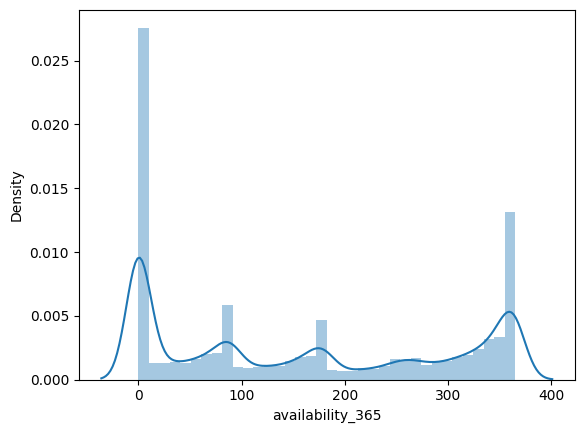

In [11]:
sns.distplot(df.availability_365.dropna());


In [12]:
df2 =df.drop(['longitude', 'latitude'],axis=1)

<ipython-input-13-df32cc096ce5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df2.corr()


<Axes: >

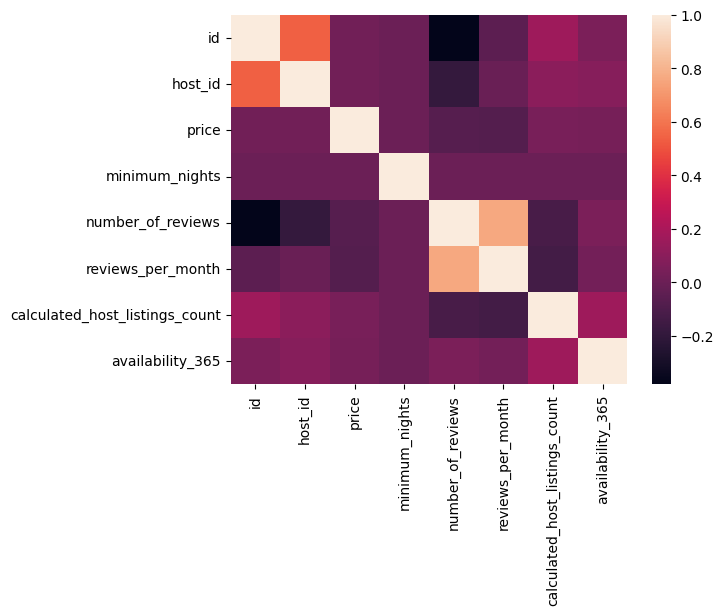

In [13]:
corr=df2.corr()
sns.heatmap(corr) ##heat map

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

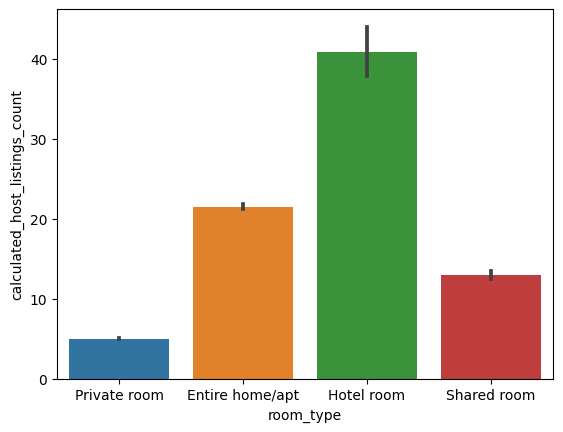

In [14]:
sns.barplot(x='room_type',y='calculated_host_listings_count',data=df)## bivariate data

<Axes: xlabel='room_type', ylabel='count'>

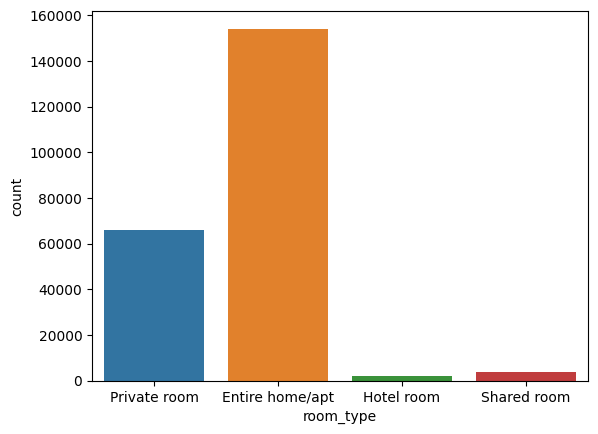

In [15]:
sns.countplot(data=df, x="room_type") ##univariate data

<Axes: title={'center': 'distribution of room types'}, ylabel='room_type'>

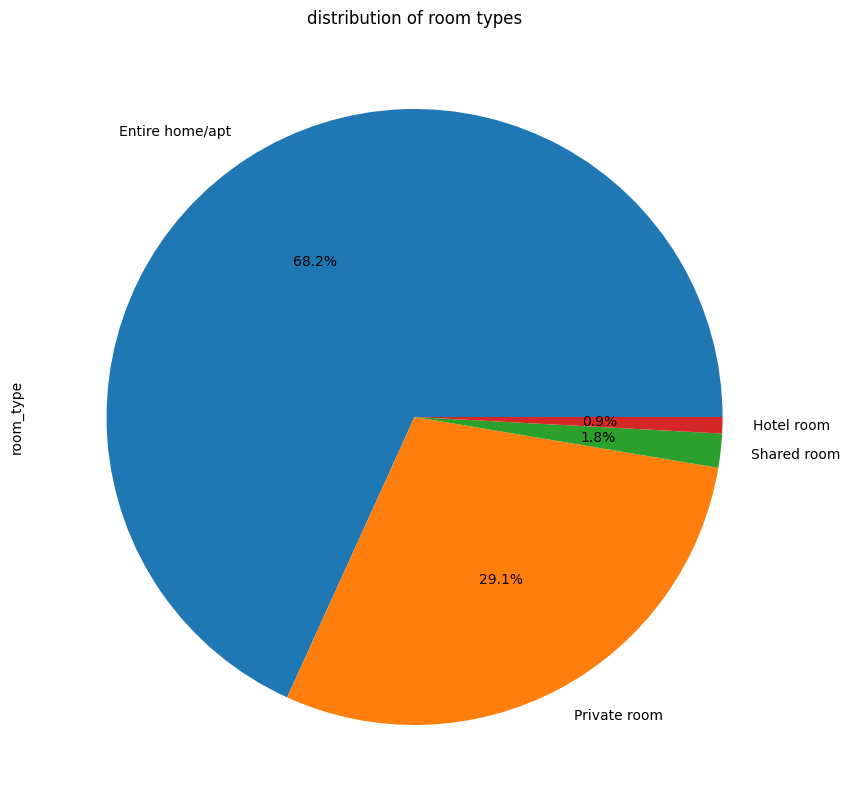

In [16]:
plt.figure(figsize= (10,10))
df2.room_type.value_counts().plot.pie(autopct="%.1f%%", title = 'distribution of room types')## distribution  of all room types available

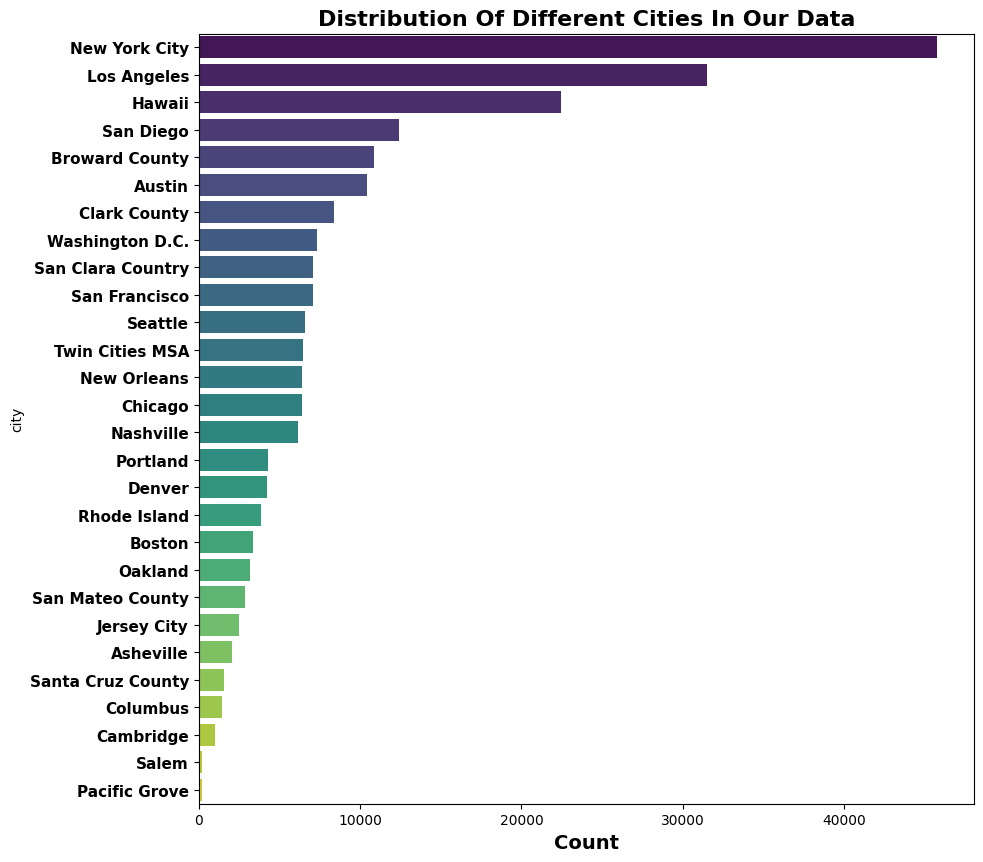

In [17]:
plt.figure(figsize = (10,10))
ax = sns.countplot(y=df['city'],order=df['city'].value_counts().index,palette='viridis')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=11,fontweight='bold')
ax.set_title('Distribution Of Different Cities In Our Data',fontsize=16,fontweight='bold')
ax.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()
## Distribution of all cities

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Asheville'),
  Text(1, 0, 'Austin'),
  Text(2, 0, 'Boston'),
  Text(3, 0, 'Broward County'),
  Text(4, 0, 'Cambridge'),
  Text(5, 0, 'Chicago'),
  Text(6, 0, 'Clark County'),
  Text(7, 0, 'Columbus'),
  Text(8, 0, 'Denver'),
  Text(9, 0, 'Hawaii'),
  Text(10, 0, 'Jersey City'),
  Text(11, 0, 'Los Angeles'),
  Text(12, 0, 'Nashville'),
  Text(13, 0, 'New Orleans'),
  Text(14, 0, 'New York City'),
  Text(15, 0, 'Oakland'),
  Text(16, 0, 'Pacific Grove'),
  Text(17, 0, 'Portland'),
  Text(18, 0, 'Rhode Island'),
  Text(19, 0, 'Salem'),
  Text(20, 0, 'San Clara Country'),
  Text(21, 0, 'San Diego'),
  Text(22, 0, 'San Francisco'),
  Text(23, 0, 'San Mateo County'),
  Text(24, 0, 'Santa Cruz County'),
  Text(25, 0, 'Seattle'),
  Text(26, 0, 'Twin Cities MSA'),
  Text(27, 0, 'Washington D.C.')])

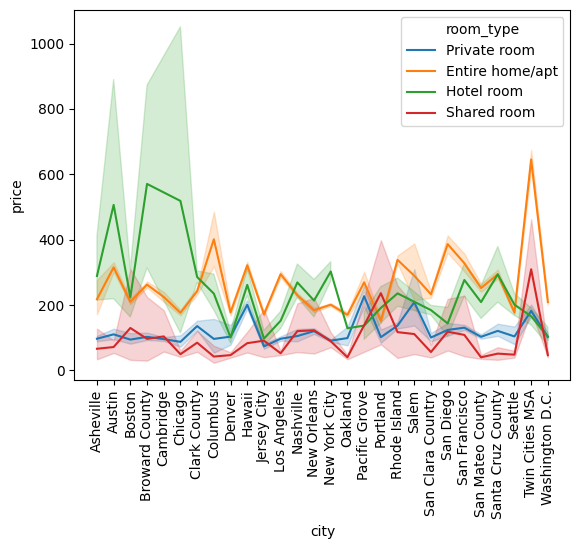

In [18]:
g=sns.lineplot(y='price',x='city',hue='room_type',data=df) # roomtype vs city
plt.xticks(rotation=90)

In [19]:
price = df["price"].copy() #Take the price as its own variable. That is what we are looking for
price = np.log(price) #Take the log of the set for normalization

In [20]:
charac = df.copy() #Take a copy of the dataframe for usage
charac = charac.drop(columns = {"price"}) #Remove the price, since we cannot predict price if it is already there

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              226030 non-null  int64         
 1   name                            226030 non-null  object        
 2   host_id                         226030 non-null  int64         
 3   host_name                       226030 non-null  object        
 4   neighbourhood_group             226030 non-null  object        
 5   neighbourhood                   226030 non-null  object        
 6   latitude                        226030 non-null  float64       
 7   longitude                       226030 non-null  float64       
 8   room_type                       226030 non-null  object        
 9   price                           226030 non-null  int64         
 10  minimum_nights                  226030 non-null  int64  

In [22]:
charact = charac.drop(columns = {"name", "host_name",  "neighbourhood", "last_review"}) #The name and hostName columns are all considered categorical data filled with the entirely different values, so there is not nearly enough memory to handle pandas bringing
#The same goes for neighbourhood_group last_review"

In [23]:
charact = pd.get_dummies(charact) #Get the dummies for easier model training
scale = StandardScaler() #Add a standard scaler to scale our data for easier use later
scale.fit(charact) #Fit the scaler with our characteristics
chara = scale.transform(charact)

In [24]:
(len(chara[0]))

76

In [25]:
charaTrain, charaTest, priceTrain, priceTest = train_test_split(chara, price, test_size = 0.2) #Split the data into train and test

In [26]:
forest = RandomForestRegressor(500) #Build a whole forest of trees
forest.fit(charaTrain, priceTrain) #Fit the forest

RandomForestRegressor(n_estimators=500)

In [27]:
predict = forest.predict(charaTest)
overallAccuracy = ("Overall", forest.score(charaTest, priceTest)) #Get the overall accuracy


In [28]:
print("Forest Accuracy: ", forest.score(charaTest, priceTest)) #Print the accuracy
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(priceTest, predict))) #Print the root mean square error


Forest Accuracy:  0.5963584384818454
Root Mean Square Error:  0.5404252953683111


In [29]:
attributes = charact.columns #Get the tested attributes
attributes = list(zip(attributes, forest.feature_importances_))
sortAtt = sorted(attributes, key = lambda x: x[1], reverse = True)

print("According to the Random Forest (most accurate), the most important factors for pricing are: ") #Start printing the most important labels
i=0 #Counter variable so only the top five are printed

#For each attribute in the sorted attributes
for label, coef in sortAtt:
    if i<5:
        print(label)
    i += 1

According to the Random Forest (most accurate), the most important factors for pricing are: 
room_type_Entire home/apt
longitude
latitude
id
reviews_per_month


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              226030 non-null  int64         
 1   name                            226030 non-null  object        
 2   host_id                         226030 non-null  int64         
 3   host_name                       226030 non-null  object        
 4   neighbourhood_group             226030 non-null  object        
 5   neighbourhood                   226030 non-null  object        
 6   latitude                        226030 non-null  float64       
 7   longitude                       226030 non-null  float64       
 8   room_type                       226030 non-null  object        
 9   price                           226030 non-null  int64         
 10  minimum_nights                  226030 non-null  int64  

In [31]:
predictions = pd.DataFrame({"truePrice": priceTest.values, "predPrice": predict}) #Create a dataframe with the predictions
predictions.head(10)


,truePrice,predPrice
0,5.652489,5.783513
1,4.442651,4.780939
2,5.010635,4.834305
3,4.905275,4.652488
4,4.934474,4.637474
5,4.934474,4.712718
6,5.129899,5.038382
7,6.536692,5.828898
8,5.081404,4.995129
9,5.298317,4.888758


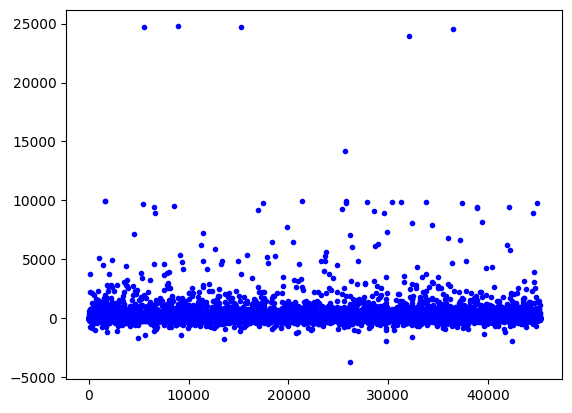

In [32]:
error = np.subtract(np.exp(predictions["truePrice"]), np.exp(predictions["predPrice"])) #Get the variance by subtracting the true and prediction
b = plt.hlines(500, xmin = 0, xmax = 25000, lw = 3) #Print a line to show variance
c = plt.hlines(-300, xmin = 0, xmax = 25000, lw = 3) #Print a lower line to show variance
a = plt.plot(error, "b.") #Plot the error
plt.show() #Show the plot

### Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression#Importing linear Regression
model=LinearRegression()#Function set up for the model
model.fit(charaTrain,priceTrain)#Fitting the input in the model
y_pred=model.predict(charaTest)
y_pred

array([4.9155733 , 4.7984621 , 5.09884662, ..., 5.42977923, 5.29858417,
       5.01878375])

In [34]:
predictions = pd.DataFrame({"original_Price": priceTest.values, "predicted_Price": y_pred})
predictions.head(10)#Predicting Price

,original_Price,predicted_Price
0,5.652489,4.915573
1,4.442651,4.798462
2,5.010635,5.098847
3,4.905275,4.952698
4,4.934474,4.455513
5,4.934474,4.040299
6,5.129899,5.127106
7,6.536692,5.677307
8,5.081404,4.342331
9,5.298317,4.568810


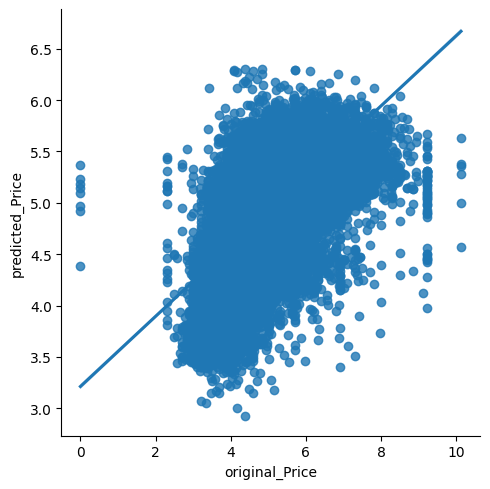

In [35]:
sns.lmplot(x="original_Price",y="predicted_Price",data=predictions)# Linear Regression graph

In [36]:
model.score(charaTest,priceTest)## negative score means worse model

0.3437960389425939

In [37]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(priceTest, y_pred)))## Too high error leading to rejecting the model

Root Mean Squared Error: 0.6890601805228697


###Decision Tree

In [38]:
from sklearn import tree
model=tree.DecisionTreeRegressor()
model.fit(charaTrain,priceTrain)
y_pred1=model.predict(charaTest)
y_pred1

array([6.10924758, 5.07517382, 4.31748811, ..., 3.95124372, 5.34710753,
       4.84418709])

In [39]:
predictions = pd.DataFrame({"original_Price": priceTest.values, "predicted_Price": y_pred1})
predictions.head(10)#Predicting Price

,original_Price,predicted_Price
0,5.652489,6.109248
1,4.442651,5.075174
2,5.010635,4.317488
3,4.905275,4.828314
4,4.934474,4.605170
5,4.934474,4.691348
6,5.129899,5.273000
7,6.536692,6.234411
8,5.081404,5.153292
9,5.298317,4.317488


In [40]:
print("Decision Tree Accuracy: ", model.score(charaTest, priceTest)) #Print the accuracy
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(priceTest, y_pred1)))#we reject this model as the accuarcy is low

Decision Tree Accuracy:  0.1953801860641705
Root Mean Square Error:  0.763015027230463


In [42]:
%%writefile app.py
import streamlit as st
st.title("hello world")

Writing app.py


In [41]:
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=aa215b3ae970882ba78b27b2039a894890c8b86b6893fbf5b4e8cfe957c205d1
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [45]:
! pip install requests

In [46]:
python3 -m http.server


SyntaxError: ignored

In [47]:
from pyngrok import ngrok

# Open a HTTP tunnel on the default port 80
public_url = ngrok.connect(80)
print(public_url)

NgrokTunnel: "https://d4a3-34-75-1-217.ngrok.io" -> "http://localhost:80"
